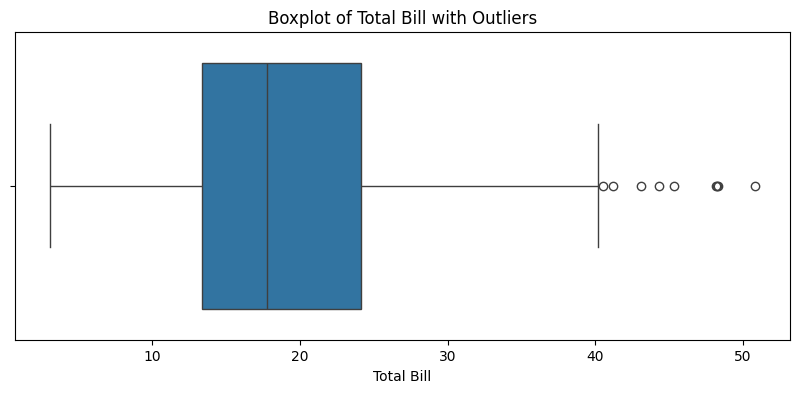

Outliers using Z-score method:
 59     48.27
156    48.17
170    50.81
212    48.33
Name: total_bill, dtype: float64
Outliers using IQR method:
 59     48.27
102    44.30
142    41.19
156    48.17
170    50.81
182    45.35
184    40.55
197    43.11
212    48.33
Name: total_bill, dtype: float64

Records detected as outliers by multiple methods:
      Value  Z_outlier  IQR_outlier  Detected_by
59   48.27       True         True            2
156  48.17       True         True            2
170  50.81       True         True            2
212  48.33       True         True            2


In [2]:
# Question: Combining Multiple Outlier Detection Methods
# Description: Combine Z-score, IQR, and Boxplot methods to detect and compare outliers in adataset.

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Load sample data
df = sns.load_dataset("tips")
data = df["total_bill"]

# Method 1: Z-score
z_scores = np.abs(stats.zscore(data))
z_outliers = data[z_scores > 3]

# Method 2: IQR
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
iqr_outliers = data[(data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))]

# Method 3: Boxplot visualization
plt.figure(figsize=(10, 4))
sns.boxplot(x=data)
plt.title("Boxplot of Total Bill with Outliers")
plt.xlabel("Total Bill")
plt.show()

# Compare results
print("Outliers using Z-score method:\n", z_outliers)
print("Outliers using IQR method:\n", iqr_outliers)

# Combine and count consensus
combined_outliers = pd.DataFrame({
    "Value": data,
    "Z_outlier": z_scores > 3,
    "IQR_outlier": ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR)))
})

# Show records flagged by both

combined_outliers["Detected_by"] = combined_outliers[["Z_outlier", "IQR_outlier"]].sum(axis=1)
print("\nRecords detected as outliers by multiple methods:\n", combined_outliers[combined_outliers["Detected_by"] > 1])

